    # Solutions to mock exam
## Page 1

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


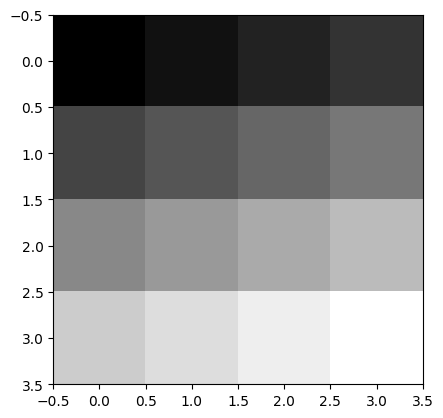

In [2]:
import numpy as np
import matplotlib.pyplot as plt

img = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
print(img)
plt.imshow(img, cmap="gray", vmin=0, vmax=15)

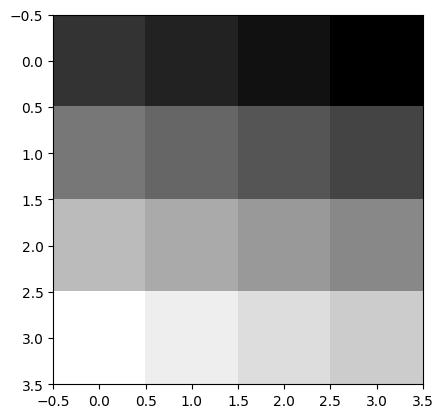

In [3]:
new_img = img[:,::-1]
plt.imshow(new_img, cmap="gray", vmin=0, vmax=15)

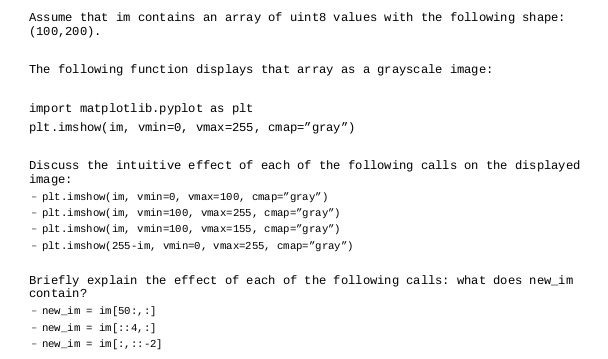

### Answers and comments
The first three calls do not change the image intensity values but only their mapping to colors when displaying. Make sure you understand why increasing vmin the image looks darker, and decreasing vmax the image looks brighter.

The fourth call inverts the image (black becomes white, and vice versa).

The last three calls operate on numpy arrays; the first discards the first 50 rows of the image;  the second considers one fow every four (thus vertically squeezing the image); the third one column every two, while also reversing their order: so it horizontally squeezes and mirrors the image.

## Page 2
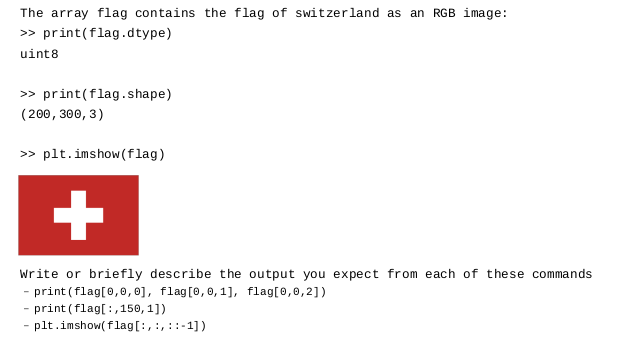

### Answers and comments

The first shows the red, green, blue values for the top left pixel.
That will be something similar to 255,0,0 (depending on the exact shade of red).

The second will print the green values along column 150 (i.e. in the vertical line in the middle of the image), top to bottom.  The result will be a 1D array.  Along that column, we see colors red, white, and then red.  The red color has very low green content (say, 0), whereas white is R,G,B=255,255,255.  The array will look something like:
[0, 0, 0, 0, ...  , 0, 255, 255, 255, ... , 255, 0, 0, ...]
It will have a length of 200 elements (one element per row).

The third will print the flag with channels in opposite orders.  The first channel is always shown as red by imshow, but it corresponds to the third channel of `flag`.  So, the flag background will be shown with color RGB=0,0,255, i.e. blue.  White remains white.

# Page 3
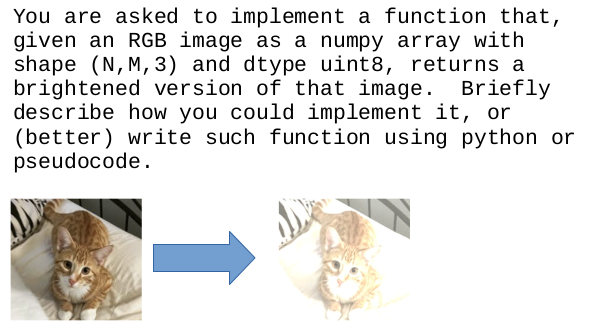

### Answers and comments

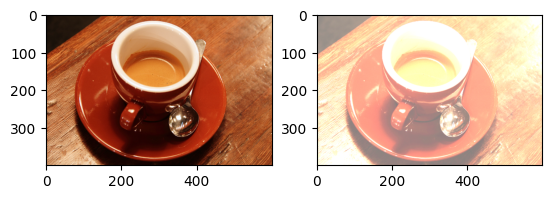

In [4]:
%matplotlib inline
import skimage
import skimage.data
import matplotlib.pyplot as plt
import numpy as np

# This is conceptually correct but in practice it won't work.
# Make sure you understand why (it has to do with im's datatype)
def brighten_buggy(im):
    bright_im = im+127
    return bright_im

def brighten(im):
    im_float = skimage.img_as_float(im) # this will have range 0-1
    bright_im = im_float+0.5
    bright_im = np.minimum(bright_im, 1.0) # make sure we never exceed the range 0-1
    bright_im = skimage.img_as_ubyte(bright_im)
    return bright_im
    
im = skimage.data.coffee()
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax1.imshow(im)
ax2.imshow(brighten(im))




# Page 4
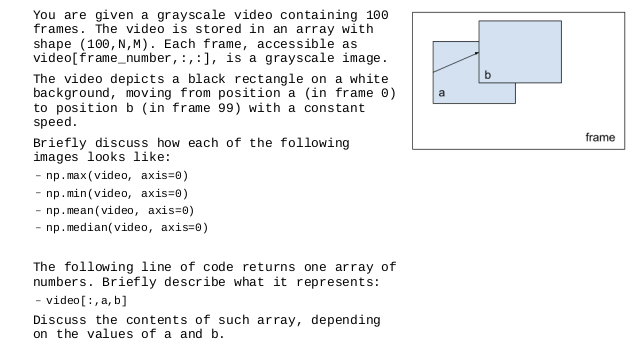

### Answers and comments

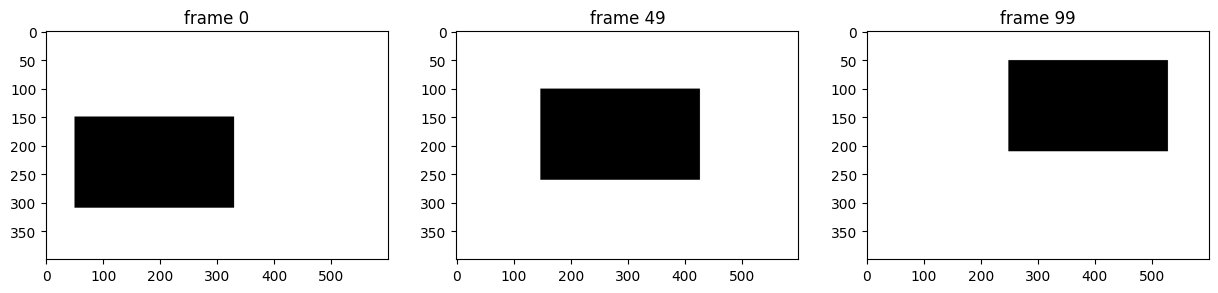

In [5]:
# Generate video

w,h = 280,160 # rectangle dimensions
N,M = 400,600 # image dimensions
video = np.ones((100,N,M))
for i in range(video.shape[0]):
    r,c = 150-i, 50+i*2 # r,c of the top left corner of the rectangle in frame i
    video[i,r:r+h,c:c+w] = 0.0

fig,axs = plt.subplots(ncols=3, figsize=(15,5))
for i,ax in zip((0,49,99), axs):
    ax.imshow(video[i,:,:], cmap="gray")
    ax.set(title=f"frame {i}")

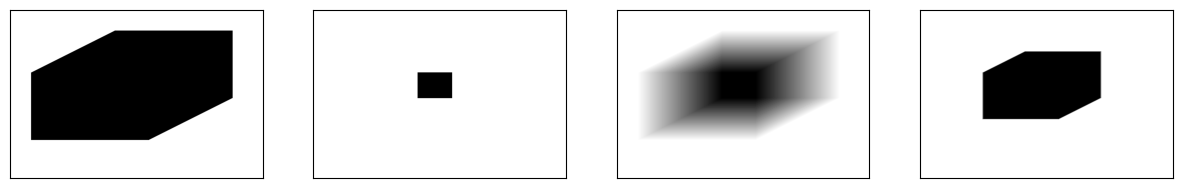

In [6]:
fig,axs = plt.subplots(ncols=4, figsize=(15,5))
axs[0].imshow(np.min(video,axis=0),vmin=0,vmax=1, cmap="gray")
axs[1].imshow(np.max(video,axis=0),vmin=0,vmax=1, cmap="gray")
axs[2].imshow(np.mean(video,axis=0),vmin=0,vmax=1, cmap="gray")
axs[3].imshow(np.median(video,axis=0),vmin=0,vmax=1, cmap="gray")
for ax in axs:
    ax.set(xticks=[], yticks=[])

Note that in the median image, the result is black if the pixel overlaps the rectangle for at least half of the frames.

The array below represents the intensity of a given pixel along the 100 frames.  Can you find one where the pixel goes from white to black to white?

interactive(children=(IntSlider(value=200, description='a', max=400), IntSlider(value=300, description='b', ma…

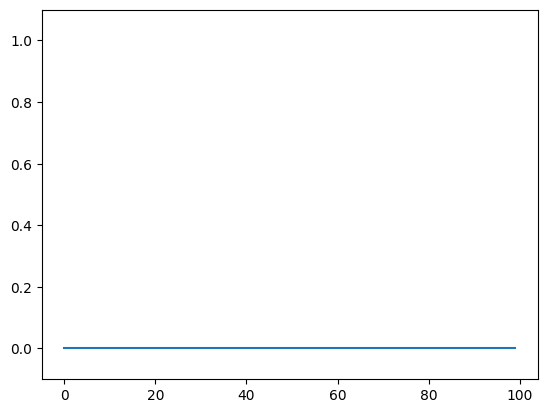

In [12]:
import ipywidgets as iw

@iw.interact(a=(0,video.shape[1]),b=(0,video.shape[2]))
def show(a,b):
    fig,ax = plt.subplots()
    ax.plot(video[:,a,b])
    ax.set(ylim=[-0.1,1.1])

## Page 5
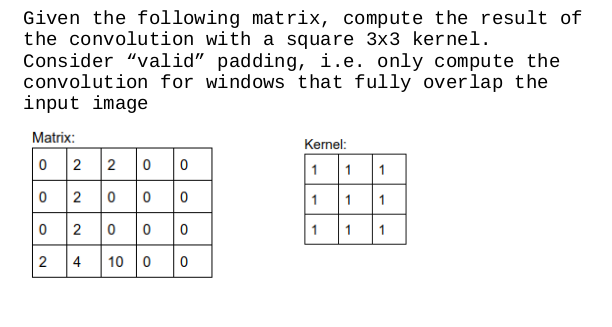

### Answers and comments
We expect a 2x3 matrix

In [8]:
import scipy
import scipy.signal
matrix = np.array([[0,2,2, 0,0],
                   [0,2,0, 0,0],
                   [0,2,0, 0,0],
                   [2,4,10,0,0]])
kernel = np.ones((3,3))
scipy.signal.convolve2d(matrix,kernel[::-1,::-1], mode="valid")

array([[ 8.,  8.,  2.],
       [20., 18., 10.]])

# Page 6
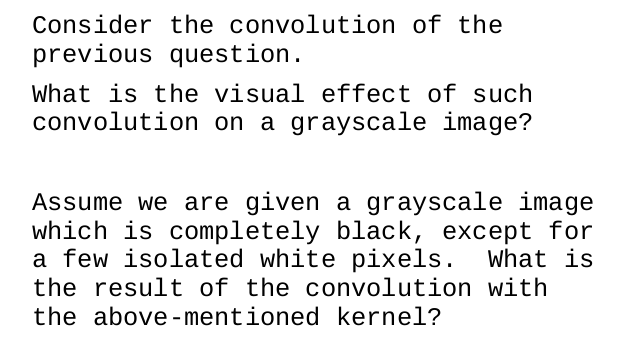

### Answers and comments

The kernel has a smoothing effect, and also makes the image much brighter.

After convolution, isolated white pixels on a black background will become 3x3 blocks.

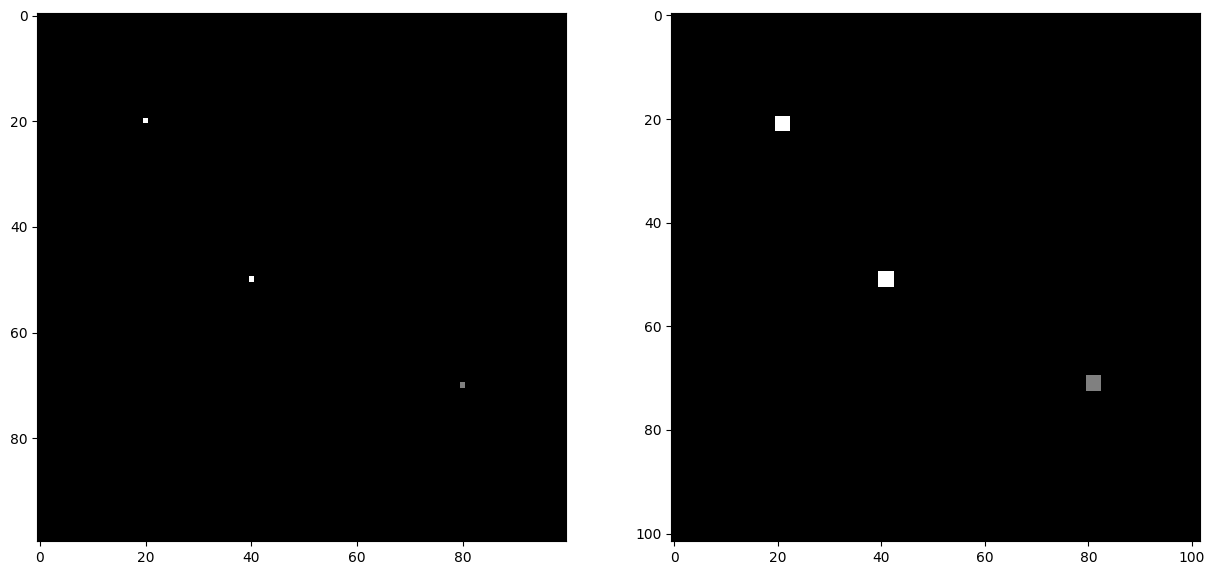

In [9]:
im = np.zeros((100,100))
im[20,20] = 1.0
im[50,40] = 1.0
im[70,80] = 0.5
conv = scipy.signal.convolve2d(im,kernel[::-1,::-1])
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))
ax1.imshow(im, cmap="gray")
ax2.imshow(conv, cmap="gray")

## Page 7
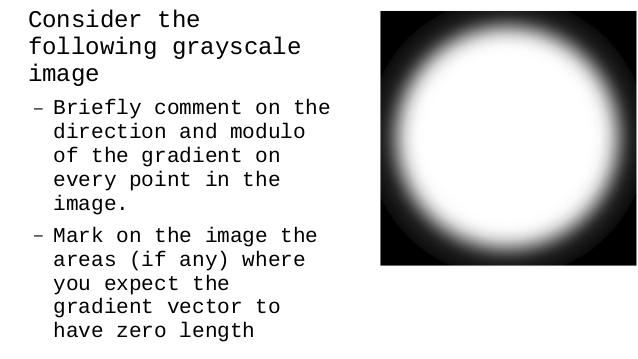

### Answers and comments

- modulo: modulo is 0 where the image is constant/uniform (i.e. the uniformly-white central circle and the uniformly-black triangles at the corners)
- direction: where it is not zero, the gradient points towards the center of the circle (direction towards which the brightness increases fastest)

## Page 8
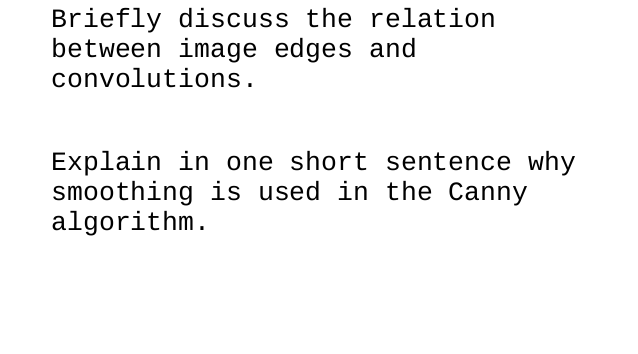

### Answers and comments

Image edges are intensity discontinuities; gradients are large at intensity discontinuities. Convolutions (e.g. with gabor filters) are used to approximate gradients.

Because gradients are strongly affected by image noise, when looking for edges one usually smooths the image before computing the gradients.  Smoothing is beneficial in this case because it reduces the effect of noise on gradients.

## Page 9
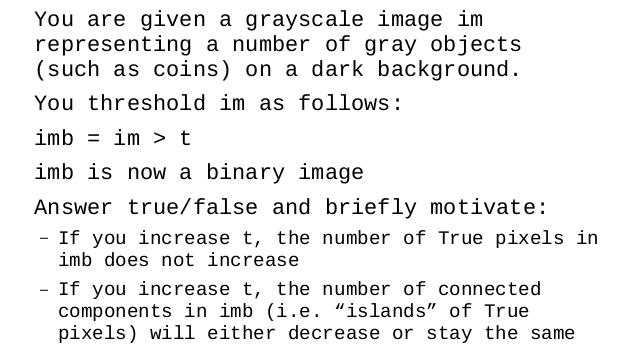



### Answers and comments

- **True**. As you incrase `t`, pixels that were False stay False; some pixels that were True might become False.
- **False**. As you incrase `t`, the number of connected components in `imb` might increase, decrease, or stay the same.

## Page 10
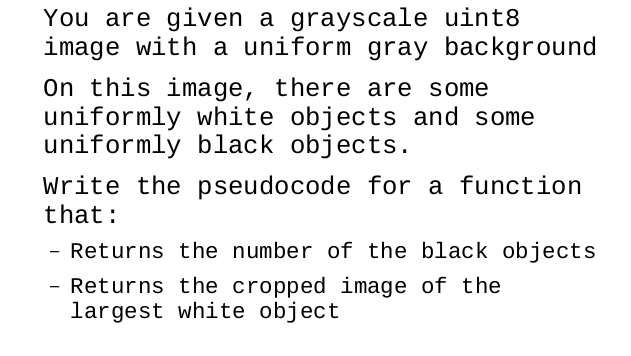

### Answers and comments

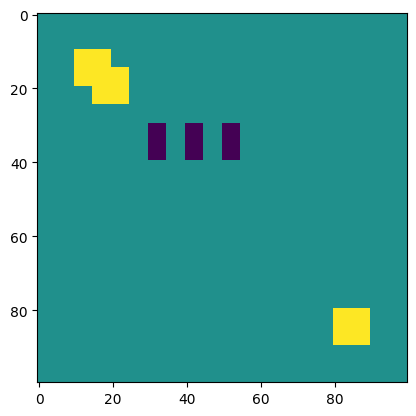

There are 3 black objects


Text(0.5, 1.0, 'Image of the largest white object')

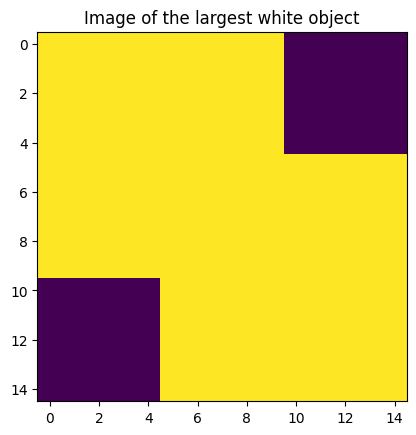

In [40]:
def fun(im):
    # Threshold
    white = im > 0.75
    black = im < 0.25

    b_objs = skimage.measure.regionprops(skimage.measure.label(black))
    # b_objs = np.max(skimage.measure.label(black))
    
    w_objs = skimage.measure.regionprops(skimage.measure.label(white))
    areas = [w_obj.area for w_obj in w_objs]
    largest = w_objs[np.argmax(areas)]
    bb = largest.bbox
    cropped_image = im[bb[0]:bb[2],bb[1]:bb[3]]
    
    return len(b_objs), cropped_image


# Generate test image (not part of the answer)
im = np.full((100,100),0.5)
im[10:20,10:20] = 1
im[15:25,15:25] = 1
im[80:90,80:90] = 1
im[30:40,30:35] = 0
im[30:40,40:45] = 0
im[30:40,50:55] = 0
plt.imshow(im)
plt.show()

n,im = fun(im)
print(f"There are {n} black objects")
plt.imshow(im)
plt.title("Image of the largest white object")

## Page 11
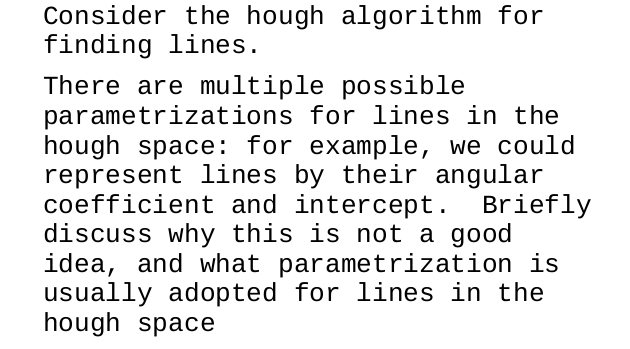

### Answers and comments
See slides on model fitting

Cannot represent vertical lines properly, because infinit slope. Is not bounded, we need the space to be bounded such that we can represent it in two dimensional array. 



## Page 12.1
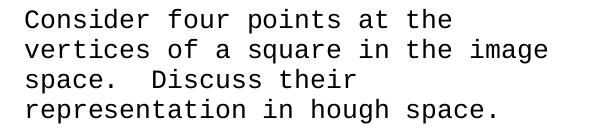

### Answers and comments

Each point yields a sinusoid in the hough space.  We'll have in total 4 sinusoids in the hough space.  Each sinusoid will intersect once with each other sinusoid: that intersection (which is a point in the hough space) corresponds to the line (in the image space) passing the two corresponding points.

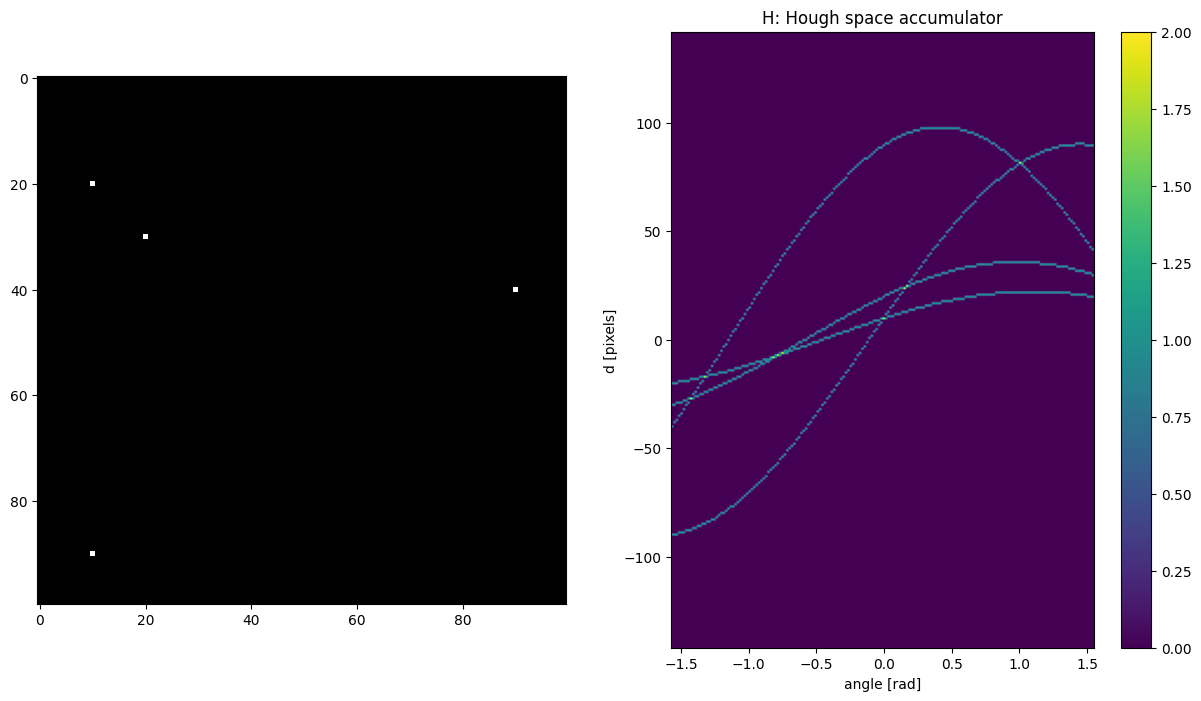

In [11]:
import skimage.transform
im = np.zeros((100,100))
im[20,10] = 1
im[30,20] = 1
im[40,90] = 1
im[90,10] = 1

H,angles,distances = skimage.transform.hough_line(im)
fig,(ax0,ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,8))
ax0.imshow(im, cmap="gray")
Himage = ax1.imshow(H,
                    extent=(angles[0],angles[-1],distances[0],distances[-1]),
                    origin="lower", aspect="auto")
ax1.set(xlabel="angle [rad]",
        ylabel="d [pixels]",
        title="H: Hough space accumulator");
plt.colorbar(Himage)

## Page 12.2
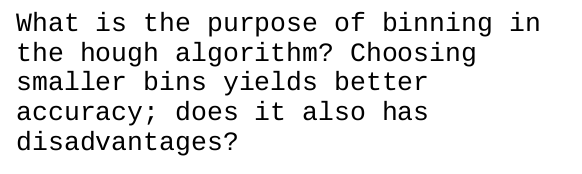

### Answers and comments

Binning is needed to accumulate votes for lines. Imagine discretizing the hough space into infinitely small bins: even if three points are almost exactly on the same line in image space, it is very unlikely that the three corresponding sinusoids in hough space will pass through exactly the same bin.  So there will be no bin with 3 votes.  Instead, we want that multiple points which are on the same line all vote for the same bin; this will be robust to a bit of noise in the position of the points only if the bins are not too small.

## Page 13
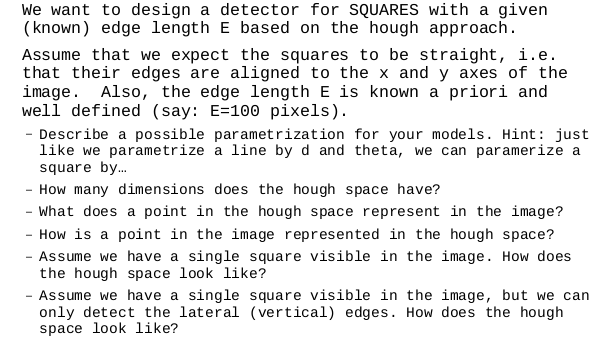

### Answers and comments
- We can parametrize a squares aligned to the image axis and with a known edge using just two numbers; e.g. the x,y position of the center of the square.  Below we assume this representation.
- 2
- A point in the hough space at coordinates (hx,hy) represents a square in the image which is centered on image pixel (hx,hy).
- A point in the image votes for all squares that pass through it.  Each of these squares is represented by a point in the hough space; these points form a square in the hough space.
- Assume the square in the image space (let's call it S) is centered at (250,350) in the image.  A point on the top left corner of the square (at coordinates (200,300)) will vote for many squares: for example, for a square centered at (150,250) (then, the point we are considering would be at the bottom right of such square); or for a square centered at (200,250) (then, our point would be at the middle of the right edge).  In general, the hough space will have votes for many squares, but only one bin (the one corresponding to S) will accumulate votes by all  points on S.
- Also in this case the bin with most votes will be the one from S.  However, the hough space will miss votes from horizontal edges (see picture below)

Consider the image below. It shows a red square in the image.  We then let just 4 of the points on that square (the large black dots) vote for the corresponding squares in the hough space.  Each point (black dot) votes for many squares, each represented by a point in hough space.  For a given black dot, these points in the hough space are on a square (blue square) centered on the black dot.  Note that the black dots in the hough space are reported only for reference. Also note that all blue squares intersect in the red diamond. The red diamond is the center of the red square.

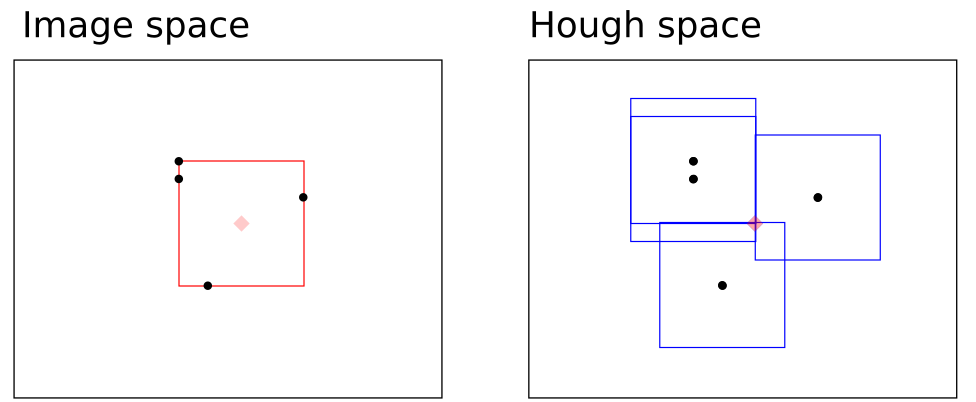

## Page 14
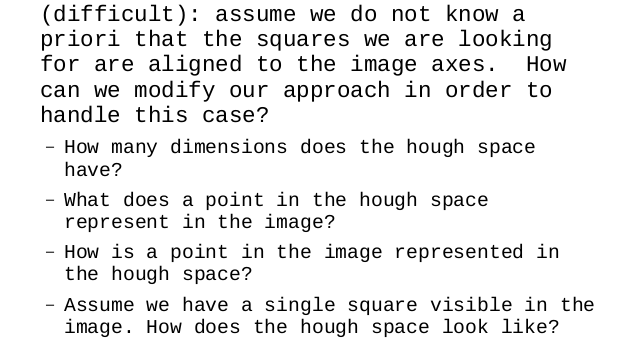

### Answers and comments
- 3: for example, two for the x,y of the center of the square, and one for the rotation (call it $\theta$).  The 3rd dimension extends in the range $0 \leq \theta < 90$ degrees.
  In the following we assume the dimension representing $\theta$ is the third, which we imagine as the "vertical" dimension of the hough space.
- a point in the 3D hough space represents a square (possibly not aligned with the image axis) in the image.  If the point is on the "floor", i.e. it lies on the $\theta=0$ plane, then the square is aligned with the image axes.  Otherwise, the square is rotated by an angle $\theta > 0$.
- a point in the image is represented by a vertical "twisted column" with a square cross section in the hough 3D space.  Each horizontal section of this column is a square.  A single point in the image votes for squares at all orientations.
- it is indeed complex to represent this; it is a 3D space where each horizontal slice looks like the question above.  We know that the bin that gets most votes should correspond to the (x,y,\theta) coordinates representing the center and rotation of the square.

## Page 15

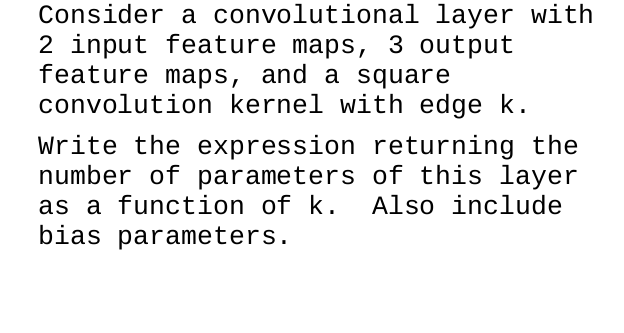

### Answers and comments
$\text{number of parameters} = 2 \cdot 3 \cdot k^2 + 3$

## Page 16
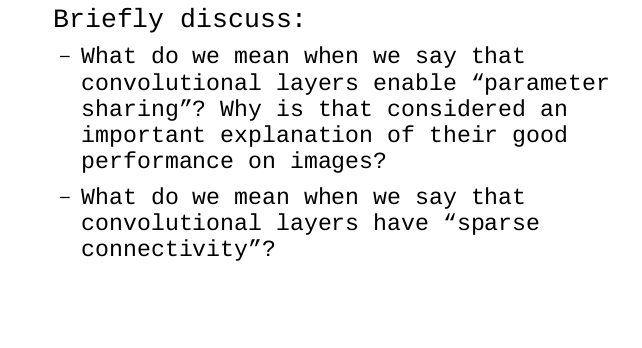

### Answers and comments
See slides in the image classification part

## Page 17


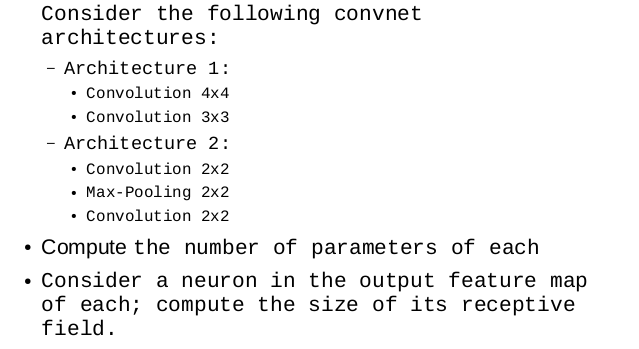

### Answers and comments
Q1: Assuming a single feature map, and accounting for bias terms.

- Architecture 1:
$\text{number of parameters} = (4^2 + 1) + (3^2 + 1)$
- Architecture 2:
$\text{number of parameters} = (2^2 + 1) + (2^2 + 1)$


Q2:

- Architecture 1: receptive field is $6\times6$ pixels
- Architecture 2: receptive field is $5\times5$ pixels
